In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *
from payment_utils import get_payment


In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
print(X_tst.shape)

cfg = additive_1x2_beta_21_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True


(40401, 2)


In [3]:
Net = additive_net.Net
Generator = beta_21_generator.Generator
Trainer = trainer.Trainer


In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)


2025-11-10 12:13:34,239:INFO:TEST ALL-400000: t = 0.1273, Net_Loss: -0.505135, Revenue: 0.505135


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D)


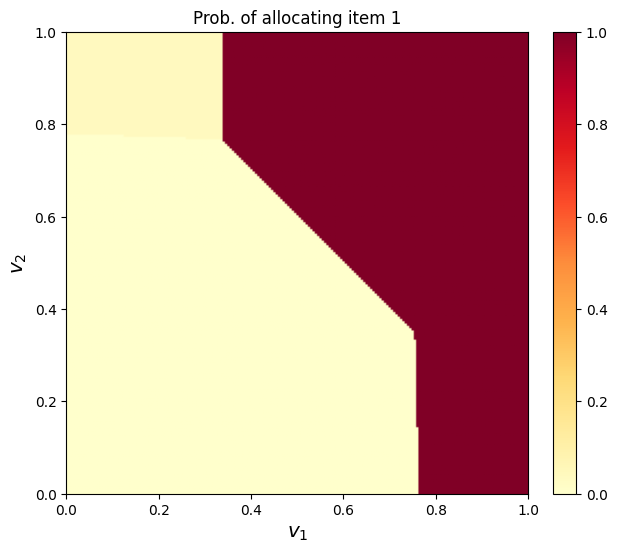

In [6]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)


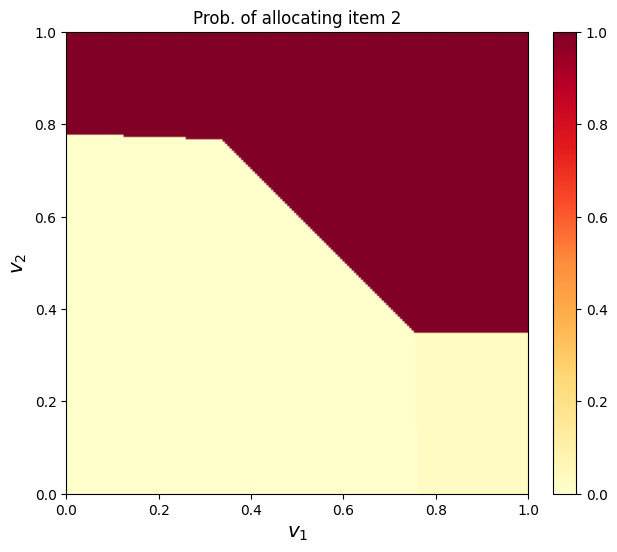

In [7]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)


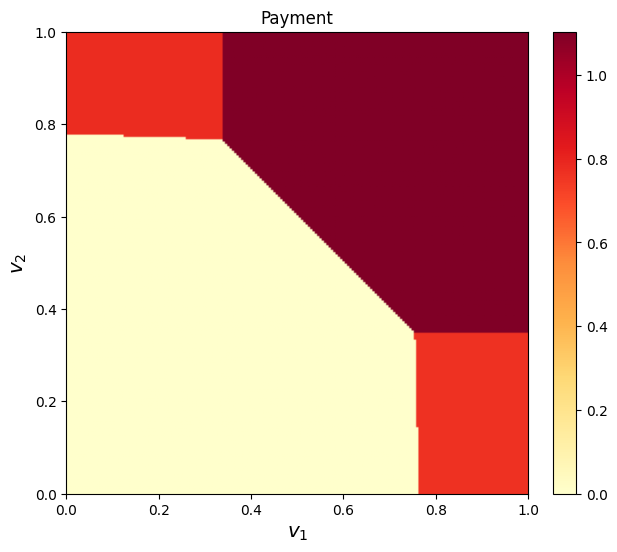

In [8]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(pay[::-1, :], extent=[0,1,0,1], cmap = 'YlOrRd')
              
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Payment')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'pay.pdf'), bbox_inches = 'tight', pad_inches = 0.05)


In [7]:
# Payment statistics
v_max = x[-1]
print("Payment Statistics:")
print(f"Min: {np.min(pay):.6f}")
print(f"Max: {np.max(pay):.6f}")
print(f"Mean: {np.mean(pay):.6f}")
print(f"Median: {np.median(pay):.6f}")
print(f"Std: {np.std(pay):.6f}")
print(f"\nPayment at selected points:")
print(f"pay[0, 0] (v1=0, v2=0): {pay[0, 0]:.6f}")
print(f"pay[D//2, D//2] (v1={v_max/2:.1f}, v2={v_max/2:.1f}): {pay[D//2, D//2]:.6f}")
print(f"pay[-1, -1] (v1={v_max:.1f}, v2={v_max:.1f}): {pay[-1, -1]:.6f}")
print(f"pay[D//4, D//4] (v1={v_max/4:.1f}, v2={v_max/4:.1f}): {pay[D//4, D//4]:.6f}")
print(f"pay[3*D//4, 3*D//4] (v1={3*v_max/4:.1f}, v2={3*v_max/4:.1f}): {pay[3*D//4, 3*D//4]:.6f}")


Payment Statistics:
Min: 0.000000
Max: 1.103306
Mean: 0.505135
Median: 0.763872
Std: 0.510707

Payment at selected points:
pay[0, 0] (v1=0, v2=0): 0.000000
pay[D//2, D//2] (v1=0.5, v2=0.5): 0.000000
pay[-1, -1] (v1=1.0, v2=1.0): 1.103306
pay[D//4, D//4] (v1=0.2, v2=0.2): 0.000000
pay[3*D//4, 3*D//4] (v1=0.8, v2=0.8): 1.103306
